In [1]:
import os
import sys

from moredata.enricher import EnricherBuilder, Enricher
from moredata.enricher.api_connector import ApiConnector
from moredata.models.data import Data
from moredata.parser import parse_document
from moredata.datasets import get_path
from moredata import Converter
import pandas as pd

URL_PATTERN = r'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=c31209c22a41b05b438143e854b57c37'
PARAMETERS = {
  "fields": [
    {
      "key": "lat",
      "name": "latitude",
    }, 
    {
      "key": "lon",
      "name": "longitude",
    }
  ]
}


In [4]:
df = pd.read_csv(get_path("airbnb-berlin"))
df = df.loc[(~df['latitude'].isna()) & (~df['longitude'].isna())]
df.iloc[0:100].to_json('./data/airbnb-berlin.json', orient='records')

/home/gegen07/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,22,36,41,45,46,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
def response_parser(response):
    return response['main']

airbnb = Data(data_file='./data/airbnb-berlin.json', parser_func=parse_document, data_type="csv")

api_weather_enricher = Enricher(connector=ApiConnector(response_parser=response_parser, url_pattern=URL_PATTERN, params=PARAMETERS))

airbnb_enriched = api_weather_enricher.enrich(airbnb)

import moredata.utils as util
util.write_json_generator_to_json("./data/airbnb-berlin-enriched", airbnb_enriched, 100000)

In [13]:
import pandas as pd
df_enriched = pd.read_json('./data/airbnb-berlin-enriched-0.json', orient='records')

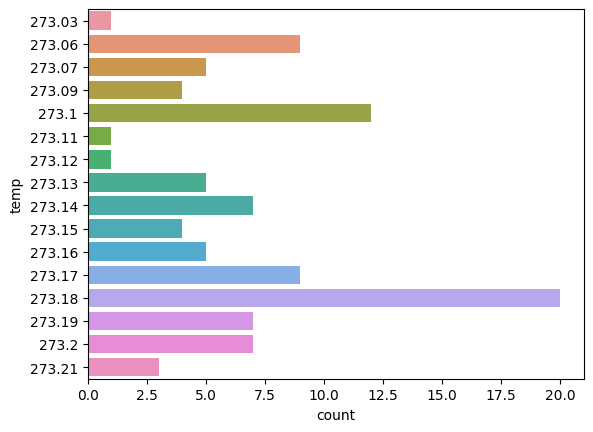

In [15]:
import seaborn
import matplotlib.pyplot as plt
seaborn.countplot(y='temp', data=df_enriched)
plt.show()